# [Project 1] Bike Rental Dataset - Linear Regression

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BikeRentalDataset.csv")

In [14]:
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


# Understanding Bike Demands

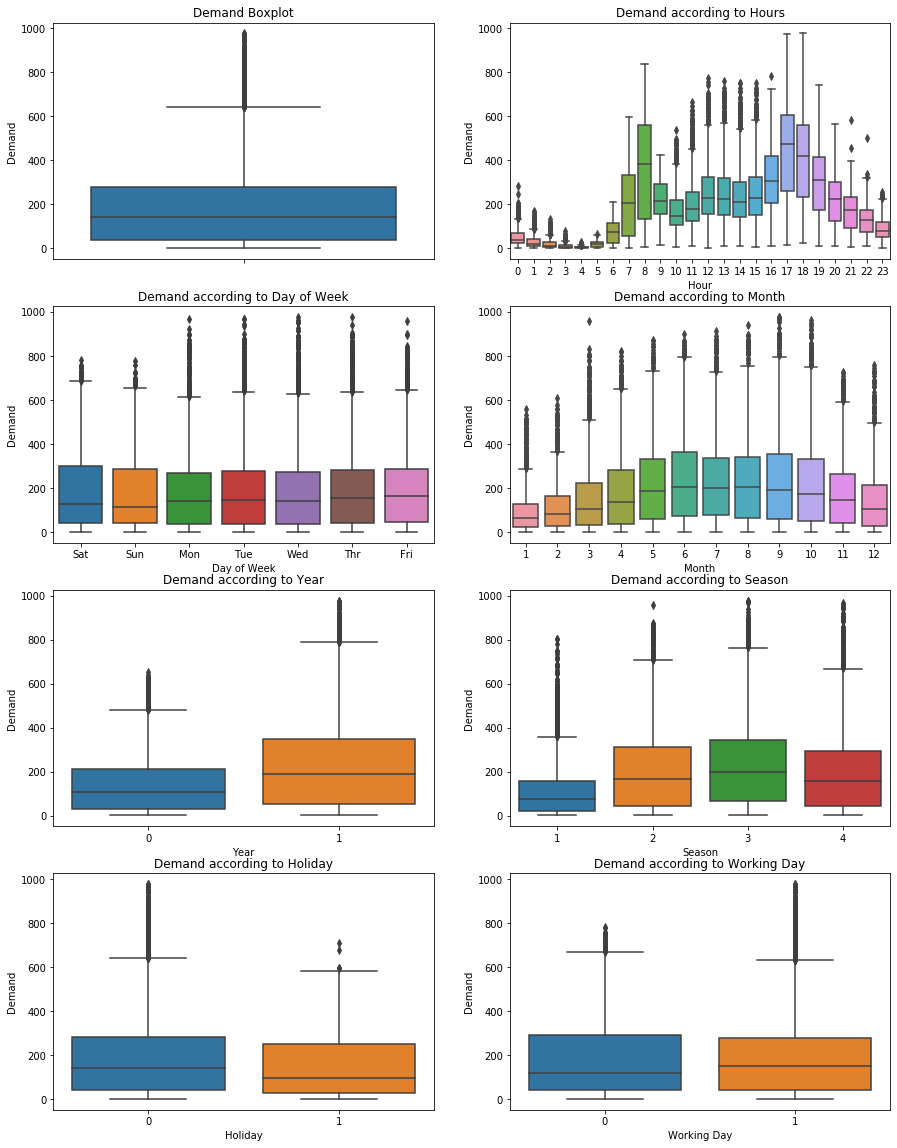

In [15]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)

sns.boxplot(data=df, y="demand", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="demand", x="hr", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="demand", x="dayOfWeek", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="demand", x="mnth", orient="v", ax=axes[1][1])
sns.boxplot(data=df, y="demand", x="yr", orient="v", ax=axes[2][0])
sns.boxplot(data=df, y="demand", x="season", orient="v", ax=axes[2][1])
sns.boxplot(data=df, y="demand", x="holiday", orient="v", ax=axes[3][0])
sns.boxplot(data=df, y="demand", x="workingday", orient="v", ax=axes[3][1])

axes[0][0].set(ylabel='Demand', title="Demand Boxplot")
axes[0][1].set(xlabel='Hour', ylabel='Demand', title="Demand according to Hours")
axes[1][0].set(xlabel='Day of Week', ylabel='Demand', title="Demand according to Day of Week")
axes[1][1].set(xlabel='Month', ylabel='Demand', title="Demand according to Month")
axes[2][0].set(xlabel='Year', ylabel='Demand', title="Demand according to Year")
axes[2][1].set(xlabel='Season', ylabel='Demand', title="Demand according to Season")
axes[3][0].set(xlabel='Holiday', ylabel='Demand', title="Demand according to Holiday")
axes[3][1].set(xlabel='Working Day', ylabel='Demand', title="Demand according to Working Day");

# Correlation Matrix

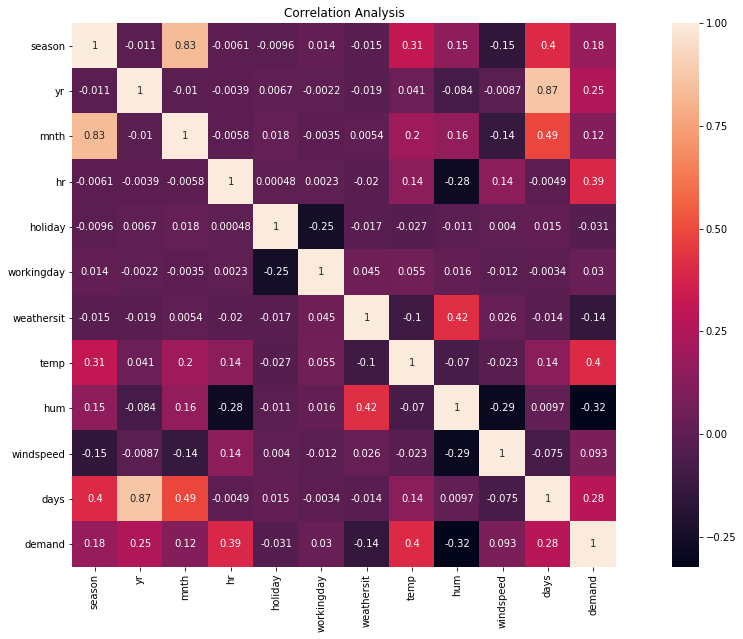

In [16]:
corr = df.corr()
plt.figure(figsize=(20,10))
plt.title('Correlation Analysis')
sns.heatmap(corr, square=True, annot=True)
plt.show()

# Building my own Regression Class

In [17]:
class linear_regression_from_scratch():
    
    def __init__(self, X, y, alpha=0.1, n_iter=1000):
        
        self.m = len(y)
        self.X = np.hstack((np.ones((self.m, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y
        self.alpha = alpha
        self.n_iter = n_iter
        self.n_features = np.size(X, 1)
        self.theta = np.zeros((self.n_features + 1, 1))
        
    def cost_function(self):
        
        h = self.X @ self.theta
        
        return (1/(2*self.m)) * sum((h-self.y)**2)
    
    """ 
    def gradient_descent(self):
    
        for i in range(self.n_iter):
            self.theta = self.theta - (self.alpha/self.m) * self.X.T @ (self.X @ self.theta - self.y)
            
        return self
    """
            
    def fit(self):
        
        J_history = np.zeros((self.n_iter,1))
        for i in range(self.n_iter):
            self.theta = self.theta - (self.alpha/self.m) * self.X.T @ (self.X @ self.theta - self.y)
            J_history[i] = self.cost_function()
        
        plt.plot(range(len(J_history)), J_history, 'r')
        plt.title("Convergence Graph of Cost Function")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.show()
        
        return self
    
    def norm_fit(self):
        
        self.theta = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y
        
        return self
    

    def train_accuracy_score(self):

        X = self.X
        y = self.y

        y_pred = X @ self.theta
        train_accuracy_score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return train_accuracy_score
    
    def test_accuracy_score(self, X, y):

        n_samples = np.size(X, 0)
        X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        
        y_pred = X @ self.theta
        test_accuracy_score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return test_accuracy_score 
    

    def predict(self, X):
        
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) / np.std(X, 0))) @ self.theta
        
        return y

In [18]:
# X and y setup
demand_df = df["demand"]
df = df.drop(columns="dayOfWeek")
df = df.drop(columns="demand")

# Testing our models against Sckit Learn

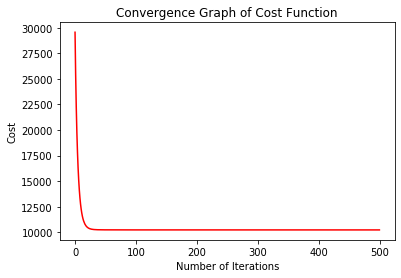

,Scratch Implementation,Scratch Normal Implementation,Sklearn's Implementation
Training Accuracy,0.387833,0.387917,0.387917
Test Accuracy,0.384348,0.384649,0.385115


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.values
y = demand_df.values.reshape((demand_df.shape[0], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scratch_model = linear_regression_from_scratch(X_train, y_train, 0.1, 500).fit()
scratch_norm_model = linear_regression_from_scratch(X_train, y_train, 0.1, 500).norm_fit()
sklearn_regressor = LinearRegression().fit(X_train, y_train)

scratch_train_accuracy = scratch_model.train_accuracy_score()
scratch_norm_train_accuracy = scratch_norm_model.train_accuracy_score()
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

scratch_test_accuracy = scratch_model.test_accuracy_score(X_test, y_test)
scratch_norm_test_accuracy = scratch_norm_model.test_accuracy_score(X_test, y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

pd.DataFrame([[scratch_train_accuracy, scratch_norm_train_accuracy, sklearn_train_accuracy],
              [scratch_test_accuracy, scratch_norm_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Scratch Implementation', 'Scratch Normal Implementation', 'Sklearn\'s Implementation'])

# Feature Engineering

In [20]:
df = pd.read_csv("BikeRentalDataset.csv")
df.head(10)

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,Sat,0,1
5,1,0,1,5,0,0,2,0.24,0.75,0.0896,Sat,0,1
6,1,0,1,6,0,0,1,0.22,0.80,0.0000,Sat,0,2
7,1,0,1,7,0,0,1,0.20,0.86,0.0000,Sat,0,3
8,1,0,1,8,0,0,1,0.24,0.75,0.0000,Sat,0,8
9,1,0,1,9,0,0,1,0.32,0.76,0.0000,Sat,0,14


In [21]:
# Remove Outliers
df = df[(np.abs(stats.zscore(df['demand'])) <= 3)]

In [22]:
# One Hot Encoding
df = pd.get_dummies(data=df, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit', 'dayOfWeek']) #, 'days'

In [23]:
# X and y setup
demand_df = df["demand"]
df = df.drop(columns="demand")

# Testing models with Features Engineered

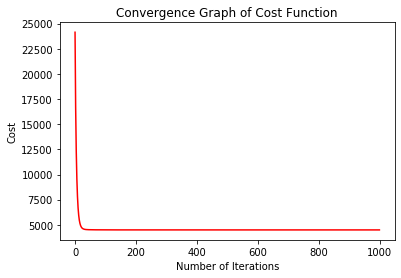

,Scratch Implementation,Scratch Normal Implementation,Sklearn's Implementation
Training Accuracy,0.673345,-7.315746e+06,0.673492
Test Accuracy,0.677212,-1.162632e+30,0.677542


In [24]:
X = df.values
y = demand_df.values.reshape((demand_df.shape[0], 1))
#y = np.log(y) # Using log to transform data into normal distribution (Our dataset doesn't have 'demand' < 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scratch_model = linear_regression_from_scratch(X_train, y_train, 0.1, 1000).fit()
scratch_norm_model = linear_regression_from_scratch(X_train, y_train, 0.1, 1000).norm_fit()
sklearn_regressor = LinearRegression().fit(X_train, y_train)

scratch_train_accuracy = scratch_model.train_accuracy_score()
scratch_norm_train_accuracy = scratch_norm_model.train_accuracy_score()
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

scratch_test_accuracy = scratch_model.test_accuracy_score(X_test, y_test)
scratch_norm_test_accuracy = scratch_norm_model.test_accuracy_score(X_test, y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

pd.DataFrame([[scratch_train_accuracy, scratch_norm_train_accuracy, sklearn_train_accuracy],
              [scratch_test_accuracy, scratch_norm_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Scratch Implementation', 'Scratch Normal Implementation', 'Sklearn\'s Implementation'])